<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Flight Price Prediction</strong></p>

In [95]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.simplefilter('ignore')

In [96]:
df = pd.read_excel('Data_Train.xlsx')


In [97]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [98]:
df.shape 

(10683, 11)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Missing values

In [100]:
df.isna().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [101]:
a = df.isna().any()
na_col = a[a].index
na_col

Index(['Route', 'Total_Stops'], dtype='object')

In [102]:
df.dropna(inplace = True) 

### Handling Duplicates rows

In [103]:
df.duplicated().sum()

220

There are 220 rows which are duplicates.

In [104]:
df.drop_duplicates(inplace=True) 

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


<AxesSubplot:>

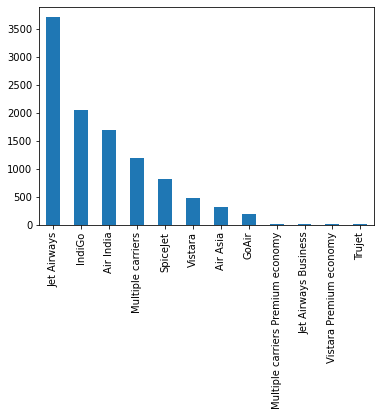

In [105]:
print(df['Airline'].value_counts())
df['Airline'].value_counts().plot(kind = 'bar') 

`jet Airways` , `indiGO` , `Air Inida` are the top airlines which passengers prefer.

In [106]:
airlines_with_very_less_data= (df['Airline'].value_counts() < 14)
l = airlines_with_very_less_data[airlines_with_very_less_data].index 
l

Index(['Multiple carriers Premium economy', 'Jet Airways Business',
       'Vistara Premium economy', 'Trujet'],
      dtype='object')

these are the airlines which data are very less compare to other airlines.
`Multiple carriers Premium economy`, `Jet Airways Business`,
       `Vistara Premium economy`, `Trujet`


In [107]:
#converting string dtype to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [108]:
df['Date_of_Journey'].dt.year.value_counts()

2019    10462
Name: Date_of_Journey, dtype: int64

we have only `2019` data 

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64


<AxesSubplot:>

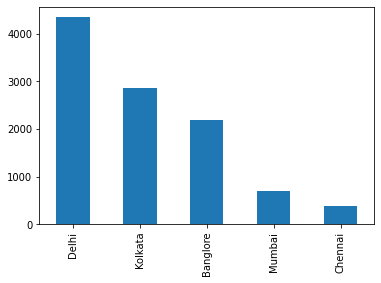

In [109]:
print(df['Source'] .value_counts())
df['Source'].value_counts().plot(kind = 'bar') 

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


<AxesSubplot:>

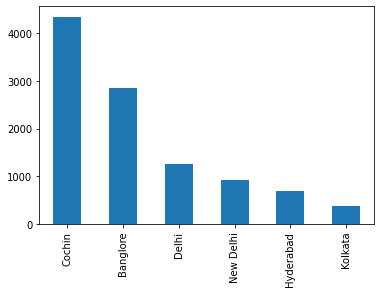

In [110]:
print(df['Destination'] .value_counts())
df['Destination'].value_counts().plot(kind = 'bar') 

From the above bar graph we have to destination delhi , new delhi. but in source only delhi is there so we will replace NewDelhi to Delhi.

<AxesSubplot:>

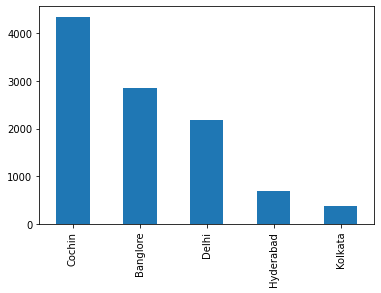

In [111]:
df['Destination'] = df['Destination'].replace('New Delhi' , 'Delhi')
df['Destination'].value_counts().plot(kind = 'bar') 

In [112]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

There are total 128 different routes.

In [113]:
print(df['Total_Stops'].value_counts())

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64


there are total 5 kind of stops but we have only one data for `4 stops` so remove that.

In [114]:
df = df[df['Total_Stops']!='4 stops']

<AxesSubplot:>

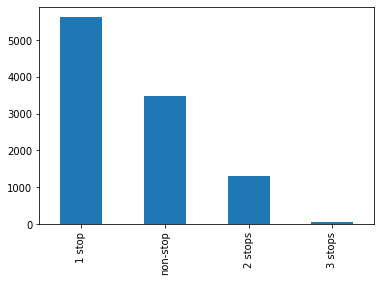

In [115]:
df['Total_Stops'].value_counts().plot(kind = 'bar') 

Replacing 1stops = 1 , 2stops= 2 , 3stops = 3 , non-stops = 0 

<AxesSubplot:>

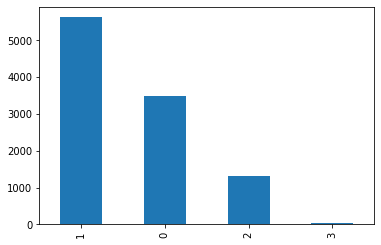

In [116]:
df['Total_Stops'] = df['Total_Stops'].str[0].replace('n' , 0).astype('int32')
df['Total_Stops'].value_counts().plot(kind = 'bar') 

<AxesSubplot:>

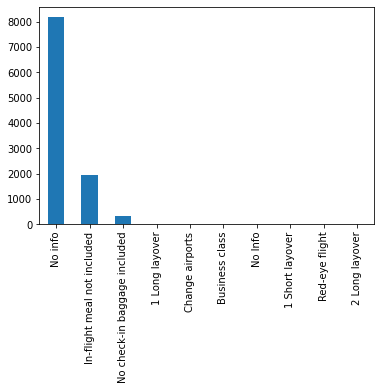

In [117]:
df['Additional_Info'].value_counts().plot(kind = 'bar') 

In [118]:
df['Dep_Time' ][0:5] 

0    22:20
1    05:50
2    09:25
3    18:05
4    16:50
Name: Dep_Time, dtype: object

In [119]:
# Extracting departure hours and departure minutes 
df['dep_hour' ] = df['Dep_Time'].str.split(':' , expand = True)[0].astype('int32')
df['dep_min']  =  df['Dep_Time'].str.split(':' , expand = True)[1].astype('int32')

In [120]:
df['Arrival_Time'][0:5] 

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
Name: Arrival_Time, dtype: object

In [121]:
# Extracting arrival hours and arrival minutes 
 
df['arrival_hour'] = df['Arrival_Time'].str[0:5].str.split(':' , expand = True)[0].astype('int32')
df['arrival_min']  = df['Arrival_Time'].str[0:5].str.split(':' , expand = True)[1].astype('int32') 

In [122]:
# Extracting Duration hours and duration minutes 

df['Duration_hour' ] = df['Duration'].str.replace('h','').str.replace('m' , '').str[0: ].str.split(' ' , expand = True )[0].fillna(0).astype('int32')
df['Duration_min' ] = df['Duration'].str.replace('h','').str.replace('m' , '').str[0: ].str.split(' ' , expand = True )[1].fillna(0).astype('int32')

In [123]:
#calculation total duration hours 
df['total_hours'] = df['Duration_hour'] + df['Duration_min'] / 60  

## EDA

In [124]:
df.columns 

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'dep_hour', 'dep_min', 'arrival_hour',
       'arrival_min', 'Duration_hour', 'Duration_min', 'total_hours'],
      dtype='object')

In [125]:
import plotly.express as px

In [126]:
px.histogram(df , x = 'Airline' , color = 'Airline' , title = 'No. of airlines')

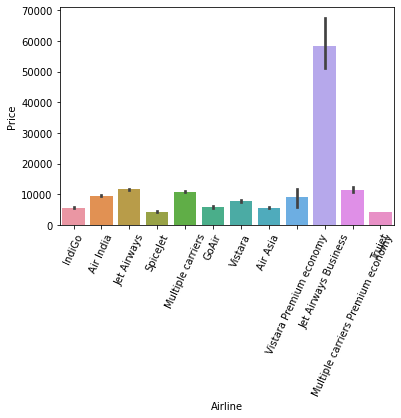

In [127]:
sns.barplot(x = 'Airline' , y = 'Price'  , data = df )  
plt.xticks(rotation = 65) 
plt.show() 

In [128]:
px.box(df , x = 'Source' , y = 'Price' , color = 'Source')

In [129]:
px.box(df , x = 'Airline' , y = 'Price' , color = 'Airline')

From graph we can see that Jet Airways Business have the highest Price., Apart from the Jet Airways Business almost all are having similar median

In [130]:
df_blr_del = df[df['Route']=='BLR → DEL']

**Lets analyse flight fare price for banglore to delhi with different airline.** 

Airline
Vistara Premium economy    8881.000000
Air India                  6716.757962
Jet Airways                6498.803150
Vistara                    5960.674286
IndiGo                     5023.526427
GoAir                      4767.033708
Air Asia                   4574.280899
SpiceJet                   4289.847059
Name: Price, dtype: float64


<AxesSubplot:xlabel='Airline'>

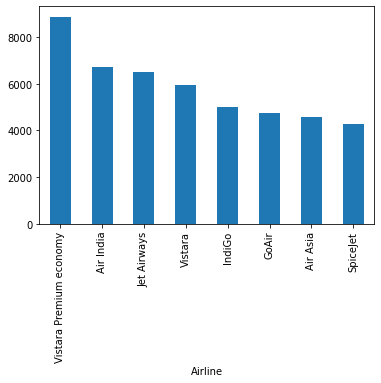

In [131]:
print(df_blr_del.groupby('Airline')['Price'].mean().sort_values(ascending = False)  )
df_blr_del.groupby('Airline')['Price'].mean().sort_values(ascending = False).plot(kind = 'bar') 

`Vistara premium economy` airline fare price is quite high comparing with other airlines.
SpiceJet fare is very cheap.

BLG->DEL average fare is almost 6500+ 

<AxesSubplot:xlabel='total_hours', ylabel='Price'>

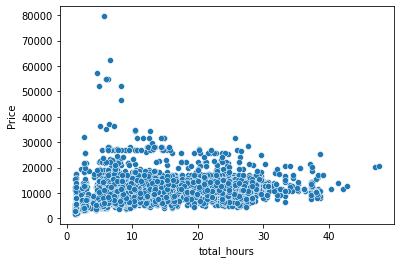

In [132]:
sns.scatterplot(x = 'total_hours' , y = 'Price' , data = df) 

## Outliers

<AxesSubplot:ylabel='Density'>

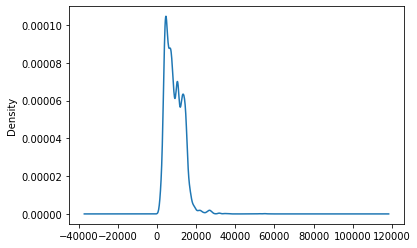

In [133]:
df['Price'].plot(kind = 'kde') 

<AxesSubplot:xlabel='Price'>

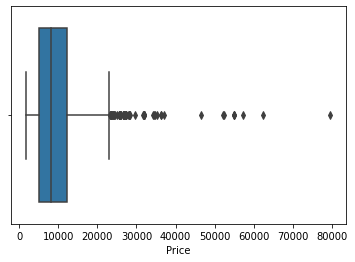

In [135]:
sns.boxplot(x = 'Price' , data = df) 

In [136]:
percentile25 = df['Price'].quantile(0.25)
percentile75 = df['Price'].quantile(0.75)
IQR  = percentile75 - percentile25
lower_limit = percentile25 - 1.5*IQR  
upper_limit = percentile75 + 1.5*IQR

In [137]:
print('number of prices which are greater than upperlimit {}:'.format(len(df[df['Price'] > upper_limit])))
print('number of prices which are greater than lower limit {}:'.format(len(df[df['Price'] < lower_limit])))

number of prices which are greater than upperlimit 94:
number of prices which are greater than lower limit 0:


In [138]:
df['Price'] = np.where(
        df['Price'] > upper_limit,
        upper_limit,
        np.where(
            df['Price'] < lower_limit,
            lower_limit, 
            df['Price']  
        )
    )

In [139]:
df.describe() 

,Total_Stops,Price,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hour,Duration_min,total_hours
count,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.00000,10461.000000
mean,0.802027,8959.409139,12.479208,24.402543,13.387917,24.720390,10.024854,28.20954,10.495013
std,0.659900,4265.669657,5.727034,18.814954,6.855835,16.571178,8.375939,16.88071,8.342866
min,0.000000,1759.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.250000
25%,0.000000,5224.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.00000,2.833333
50%,1.000000,8266.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.00000,8.416667
75%,1.000000,12341.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.00000,15.166667
max,3.000000,23016.500000,23.000000,55.000000,23.000000,55.000000,47.000000,55.00000,47.666667


In [140]:
df['month'] = df['Date_of_Journey'].dt.month
df['date']  =df['Date_of_Journey'].dt.day  

In [141]:
cols = ['Date_of_Journey' , 'Route' , 'Dep_Time' , 'Arrival_Time' , 'Duration' , 'Additional_Info' , 'Duration_hour' , 'Duration_min']
final_df = df.drop(columns=cols , axis = True )
final_df.head()

,Airline,Source,Destination,Total_Stops,Price,dep_hour,dep_min,arrival_hour,arrival_min,total_hours,month,date
0,IndiGo,Banglore,Delhi,0,3897.0,22,20,1,10,2.833333,3,24
1,Air India,Kolkata,Banglore,2,7662.0,5,50,13,15,7.416667,1,5
2,Jet Airways,Delhi,Cochin,2,13882.0,9,25,4,25,19.000000,9,6
3,IndiGo,Kolkata,Banglore,1,6218.0,18,5,23,30,5.416667,12,5
4,IndiGo,Banglore,Delhi,1,13302.0,16,50,21,35,4.750000,1,3


In [142]:
pipe_df = final_df.copy()

In [143]:
final_df = pd.get_dummies(final_df , drop_first=True)

In [144]:
final_df.head()

,Total_Stops,Price,dep_hour,dep_min,arrival_hour,arrival_min,total_hours,month,date,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897.0,22,20,1,10,2.833333,3,24,0,...,0,0,0,0,0,0,0,1,0,0
1,2,7662.0,5,50,13,15,7.416667,1,5,1,...,0,0,0,0,1,0,0,0,0,0
2,2,13882.0,9,25,4,25,19.000000,9,6,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218.0,18,5,23,30,5.416667,12,5,0,...,0,0,0,0,1,0,0,0,0,0
4,1,13302.0,16,50,21,35,4.750000,1,3,0,...,0,0,0,0,0,0,0,1,0,0


### Correlation

In [145]:
final_df.head()

,Total_Stops,Price,dep_hour,dep_min,arrival_hour,arrival_min,total_hours,month,date,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897.0,22,20,1,10,2.833333,3,24,0,...,0,0,0,0,0,0,0,1,0,0
1,2,7662.0,5,50,13,15,7.416667,1,5,1,...,0,0,0,0,1,0,0,0,0,0
2,2,13882.0,9,25,4,25,19.000000,9,6,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218.0,18,5,23,30,5.416667,12,5,0,...,0,0,0,0,1,0,0,0,0,0
4,1,13302.0,16,50,21,35,4.750000,1,3,0,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

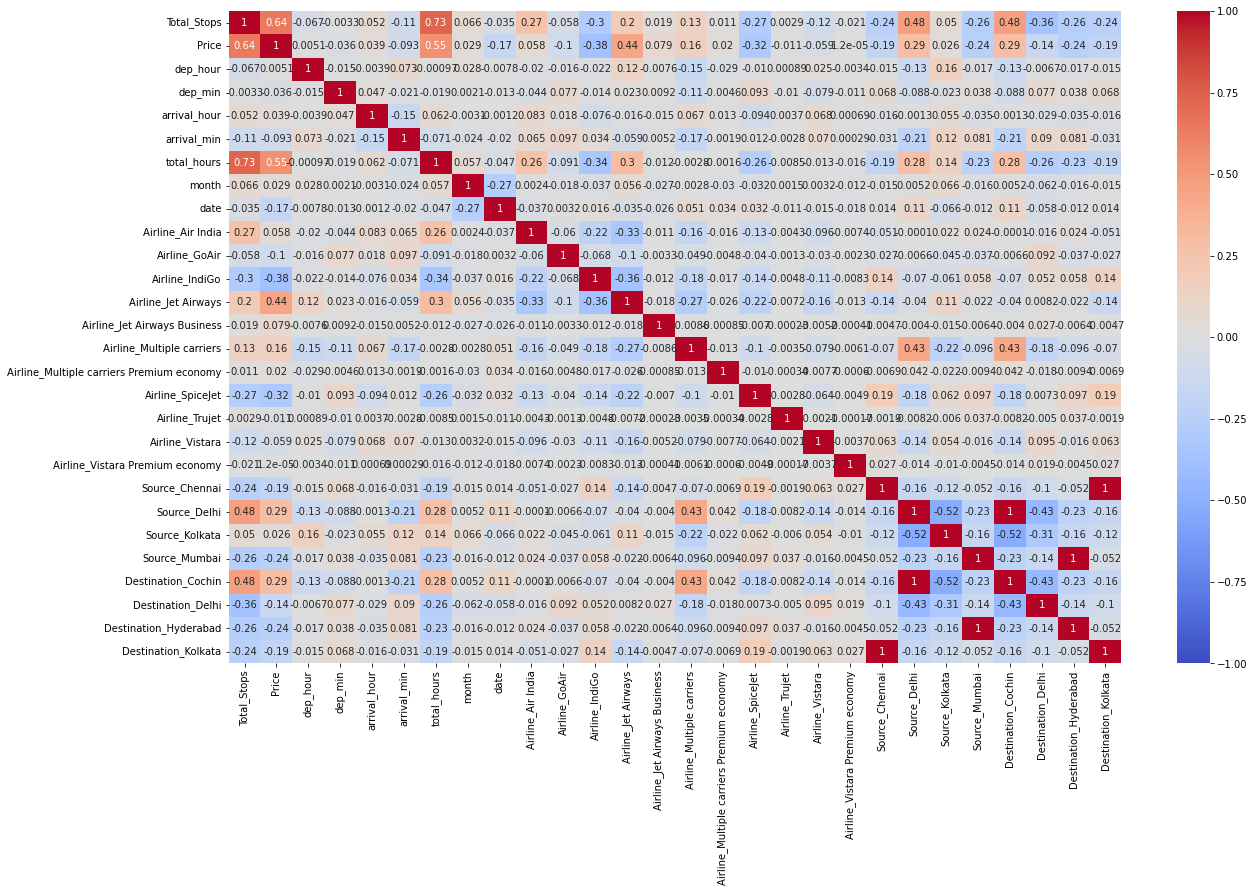

In [52]:
plt.figure(figsize= (20,12))
sns.heatmap(final_df.corr() , annot = True , cmap = 'coolwarm' , vmin = -1 , vmax = 1 , robust = True ) 

In [53]:
final_df.corr()['Price'].sort_values(ascending = False )[1:]

Total_Stops                                  0.644791
total_hours                                  0.545310
Airline_Jet Airways                          0.440501
Destination_Cochin                           0.291081
Source_Delhi                                 0.291081
Airline_Multiple carriers                    0.159540
Airline_Jet Airways Business                 0.078948
Airline_Air India                            0.057611
arrival_hour                                 0.038818
month                                        0.028655
Source_Kolkata                               0.025965
Airline_Multiple carriers Premium economy    0.020339
dep_hour                                     0.005148
Airline_Vistara Premium economy              0.000012
Airline_Trujet                              -0.011047
dep_min                                     -0.035714
Airline_Vistara                             -0.059408
arrival_min                                 -0.092675
Airline_GoAir               

In [73]:
# dropping price columns
X = final_df.drop('Price' , 1 ) 
# standarization of price columns 
y = final_df['Price'] 

In [74]:
#train test split with 33% test values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [75]:
X_train.shape , X_test.shape 

((7008, 27), (3453, 27))

### Modelling

In [76]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [77]:
def model_feature(model):
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    print(str(model)[0 : -2] + ' ' 'Model')
    print('r2_score:{}'.format(round(r2_score(y_test , y_pred) , 2)))
    print('MAE',round(mean_absolute_error(y_test , y_pred) , 2))
    print('MAPE' ,  round(mean_absolute_percentage_error(y_test , y_pred) , 2)) 
    print('MSE' , round(mean_squared_error(y_test , y_pred) , 2))


### LinearRegression

In [78]:
model_feature(LinearRegression()) 

LinearRegression Model
r2_score:0.61
MAE 1965.97
MAPE 0.25
MSE 6952014.14


### Lasso

In [79]:
model_feature(Lasso()) 

Lasso Model
r2_score:0.61
MAE 1967.56
MAPE 0.25
MSE 6956360.97


### Ridge

In [80]:
model_feature(Ridge()) 

Ridge Model
r2_score:0.61
MAE 1968.24
MAPE 0.25
MSE 6959724.75


### KNeighborsRegressor

In [81]:
model_feature(KNeighborsRegressor()) 

KNeighborsRegressor Model
r2_score:0.61
MAE 1853.16
MAPE 0.22
MSE 6866271.21


### RandomForestRegressor

In [82]:
model_feature(RandomForestRegressor()) 

RandomForestRegressor Model
r2_score:0.81
MAE 1168.15
MAPE 0.13
MSE 3299105.54


### GradientBoostingRegressor

In [83]:
model_feature(GradientBoostingRegressor()) 

GradientBoostingRegressor Model
r2_score:0.78
MAE 1451.1
MAPE 0.17
MSE 3818479.5


### AdaBoostRegressor

In [84]:
model_feature(AdaBoostRegressor()) 

AdaBoostRegressor Model
r2_score:0.65
MAE 2036.29
MAPE 0.29
MSE 6254673.42


### ExtraTreesRegressor

In [85]:
model_feature(ExtraTreesRegressor()) 

ExtraTreesRegressor Model
r2_score:0.77
MAE 1256.49
MAPE 0.15
MSE 4045714.9


### VotingRegressor

In [86]:
from sklearn.ensemble import VotingRegressor,StackingRegressor


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
# xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

model_vr = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('et',et)],weights=[5,1,1])

model_vr.fit(X_train,y_train)

y_pred = model_vr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8373183834310265
MAE 1178.4128403091106


### StackingRegressor

In [87]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
]

pipe = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred)) 

R2 score 0.8375306374225571
MAE 1159.5209881779238


### RandomForestRegressor

In [88]:
model_rfr = RandomForestRegressor() 
model_rfr.fit(X_train , y_train)
model_rfr.predict(X_test)
r2_score(y_test,y_pred)

0.8375306374225571

In [89]:
model_list = [LinearRegression() , Ridge() , Lasso() , KNeighborsRegressor() , DecisionTreeRegressor() , RandomForestRegressor() , GradientBoostingRegressor() , AdaBoostRegressor() , ExtraTreesRegressor() ]
model_list1 = []
R2_score = []
mae = [] 
mape = []
mse = []

for model in model_list:
    model_list1.append(str(model)[0:-2])
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test) 
    R2_score.append(round(r2_score(y_test , y_pred) , 2))
    mae.append(round(mean_absolute_error(y_test , y_pred) , 2))
    mape.append(round(mean_absolute_percentage_error(y_test , y_pred) , 2))
    mse.append(round(mean_squared_error(y_test , y_pred) , 2))
    

In [90]:
dict = {'Model':model_list1, 'R2_score':R2_score , 'MAPE':mape , 'MAE':mae , 'MSE':mse}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'R2_score')
model_df 

,Model,R2_score,MAPE,MAE,MSE
5,RandomForestRegressor,0.81,0.14,1168.03,3287082.61
6,GradientBoostingRegressor,0.78,0.17,1451.10,3815627.34
8,ExtraTreesRegressor,0.77,0.15,1256.92,4041303.72
4,DecisionTreeRegressor,0.71,0.16,1368.76,5194713.28
7,AdaBoostRegressor,0.63,0.30,2091.27,6588444.73
0,LinearRegression,0.61,0.25,1965.97,6952014.14
1,Ridge,0.61,0.25,1968.24,6959724.75
2,Lasso,0.61,0.25,1967.56,6956360.97
3,KNeighborsRegressor,0.61,0.22,1853.16,6866271.21


we are getting Best R2_score with RandomForestRegressor

### Exporting the Model

In [91]:
import pickle

pickle.dump(final_df,open('final_df.pkl','wb'))
pickle.dump(model_rfr,open('model.pkl','wb'))

**If you like this notebook.**

**Please Upvote**

**keep learning!**

In [92]:
final_df

,Total_Stops,Price,dep_hour,dep_min,arrival_hour,arrival_min,total_hours,month,date,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897.0,22,20,1,10,2.833333,3,24,0,...,0,0,0,0,0,0,0,1,0,0
1,2,7662.0,5,50,13,15,7.416667,1,5,1,...,0,0,0,0,1,0,0,0,0,0
2,2,13882.0,9,25,4,25,19.000000,9,6,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218.0,18,5,23,30,5.416667,12,5,0,...,0,0,0,0,1,0,0,0,0,0
4,1,13302.0,16,50,21,35,4.750000,1,3,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107.0,19,55,22,25,2.500000,9,4,0,...,0,0,0,0,1,0,0,0,0,0
10679,0,4145.0,20,45,23,20,2.583333,4,27,1,...,0,0,0,0,1,0,0,0,0,0
10680,0,7229.0,8,20,11,20,3.000000,4,27,0,...,0,0,0,0,0,0,0,1,0,0
10681,0,12648.0,11,30,14,10,2.666667,1,3,0,...,1,0,0,0,0,0,0,1,0,0


## Model Using Pipe and columntransfomer from starting

In [147]:
pipe_df.head() 

,Airline,Source,Destination,Total_Stops,Price,dep_hour,dep_min,arrival_hour,arrival_min,total_hours,month,date
0,IndiGo,Banglore,Delhi,0,3897.0,22,20,1,10,2.833333,3,24
1,Air India,Kolkata,Banglore,2,7662.0,5,50,13,15,7.416667,1,5
2,Jet Airways,Delhi,Cochin,2,13882.0,9,25,4,25,19.000000,9,6
3,IndiGo,Kolkata,Banglore,1,6218.0,18,5,23,30,5.416667,12,5
4,IndiGo,Banglore,Delhi,1,13302.0,16,50,21,35,4.750000,1,3


In [150]:
X = pipe_df.drop('Price' , 1 )
y = np.log1p(pipe_df['Price'])

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [152]:
X_train.head()

,Airline,Source,Destination,Total_Stops,dep_hour,dep_min,arrival_hour,arrival_min,total_hours,month,date
8658,IndiGo,Banglore,Delhi,0,4,0,6,50,2.833333,4,21
4580,Jet Airways,Kolkata,Banglore,1,17,0,9,45,16.750000,6,5
3912,Jet Airways,Kolkata,Banglore,1,20,25,10,55,14.500000,5,15
5280,Vistara,Kolkata,Banglore,1,20,20,18,50,22.500000,5,15
6686,Jet Airways,Delhi,Cochin,1,2,15,12,35,10.333333,6,24


In [156]:
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score , mean_absolute_error


In [158]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
# from xgboost import XGBRegressor

In [168]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf' , OneHotEncoder(sparse=False ,drop = 'first') , ['Airline' , 'Source' , 'Destination'])
    ] , remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1' , step1) , 
    ('step2' , step2)
])

pipe.fit(X_train , y_train) 

y_pred = pipe.predict(X_test)
                      
print('R2 score' , r2_score(y_test , y_pred))

R2 score 0.8559185133811142


In [ ]:
import pickle

pickle.dump(final_df,open('final_df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb')) 